In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
#dfD = pd.read_excel('data\Diagnosticos2.xlsx')
#nCols = dict()
#for c in dfD.columns:
#    nCols[c] = c.upper().replace('Ã±','NI')
#dfD.rename(columns=nCols,inplace = True)
#dfD.head()

In [6]:
df = pd.read_excel('data\Datos basicos.xlsx')
nCols = dict()
for c in df.columns:
    nCols[c] = c.upper().replace('Ã±','NI')
df.rename(columns=nCols,inplace = True)
nCols = {'ID':'ID', 'EDAD':'AGE', 'GENERO':'SEX', 'ESCOLARIDAD':'EDUCATION_LEVEL', 'ESTADOCIVIL':'MARITAL_STATUS', 'PREFERENCIA':'SEXUAL_PREFERENCE',
       'DEPARTAMENTO':'DEPARTMENT', 'CIUDAD':'CITY', 'ESTRATO':'STRATUM', 'ZONA':'ZONE', 'ACOMPANIANTE':'COMPANION',
       'NIVELSOCIOECONOMICO':'SOCIOECONOMIC_LEVEL', 'OCUPACION':'OCUPATION', 'REGIMEN':'REGIME', 'TIPOAFILIACION':'AFFILIATION_TYPE',
       'RELACIONLABORAL':'WORKING_STATUS', 'FE_NACIMIENTO':'BIRTHDATE'}
df.rename(columns=nCols,inplace = True)
education={'ANALFABETA':'Analphabet','EDAD PREESCOLAR':'Preschool','PRIMARIA':'Elementary','SECUNDARIA':'Highschool',  
           'TECNICO':'Technic','TECNOLOGO':'Technologist','UNIVERSITARIO':'Undergraduate','POSGRADO':'Graduate'}
df['Education'] = df['EDUCATION_LEVEL'].apply(lambda x: education[x] if x in education else x)
maritalStatus ={'SOLTERO (A)':'Single','UNIÓN LIBRE':'Free union','CASADO (A)':'Married','SEPARADO (A)':'Divorced','VIUDO (A)':'Widow','SIN DEFINIR':'Undefined'}
df['MaritalStatus']= df['MARITAL_STATUS'].apply(lambda x: maritalStatus[x] if x in maritalStatus else x)
df['LifeCyle']= df['AGE'].apply(lambda x: 'Early infant' if x<6 else ('Infant' if x<12 else ('Teenager' if x<18 else ('Young adult' if x<27 else ('Adult' if x<60 else ('Elderly' if x<110 else 'N/A'))))))
workingStatus = {'EMPLEADO':'Employee','MENOR NO LABORA':'Minor','SIN EMPLEO':'Unemployed','PENSIONADO':'Retired',
                 'INDEPENDIENTE':'Independent'}
df['WorkingStatus'] = df['WORKING_STATUS'].apply(lambda x: workingStatus[x] if x in workingStatus else x)
zone = {'URBANA':'Urban','RURAL':'Rural'}
df['Zone'] = df['ZONE'].apply(lambda x: zone[x] if x in zone else x)
ocupation = {'EMPLEADO':'Employee', 'ESTUDIANTE':'Student', 'SIN DEFINIR':'Not specified', 'PENSIONADO':'Retired', 
             'DESEMPLEADO':'Unemployed',
 'AMA DE CASA':'Household','JUBILADO':'Retired','INDEPENDIENTE':'Independent'}
df['Ocupation'] = df['OCUPATION'].apply(lambda x: ocupation[x] if x in ocupation else x)
regime = {'CONTRIBUTIVO':'Contributory', 'SUBSIDIADO':'Subsidiary', 'PARTICULAR':'Particular', 'OTRO':'Others'}
df['Regime'] = df['REGIME'].apply(lambda x: regime[x] if x in regime else x)
df= df.sort_values(by=['AGE', 'SEX', 'EDUCATION_LEVEL', 'MARITAL_STATUS',
       'SEXUAL_PREFERENCE', 'DEPARTMENT', 'CITY', 'STRATUM', 'ZONE',
       'COMPANION', 'SOCIOECONOMIC_LEVEL', 'OCUPATION', 'REGIME',
       'AFFILIATION_TYPE', 'WORKING_STATUS', 'BIRTHDATE', 'Education',
       'MaritalStatus', 'LifeCyle', 'WorkingStatus', 'Zone', 'Ocupation',
       'Regime'])
df = df.drop_duplicates('ID',keep='first')
df = df.sort_values(by=['ID'])
df['Ones'] = 1
df.to_csv('data\DatosBasicosL.csv',index = False)

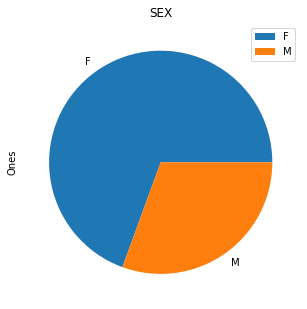

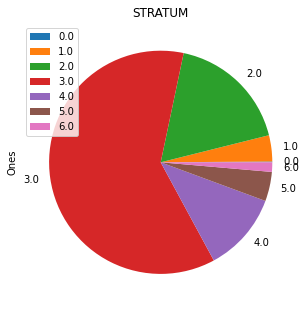

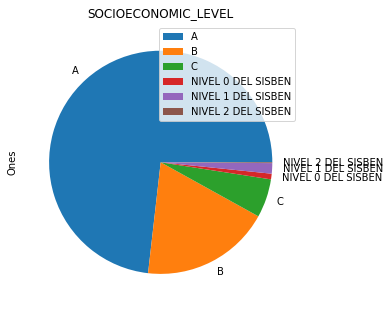

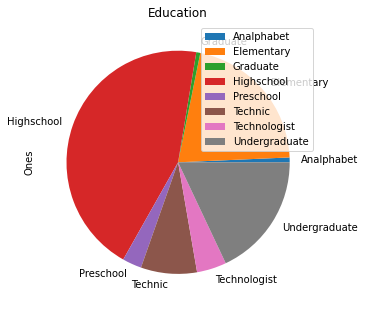

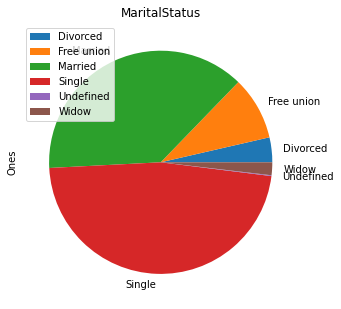

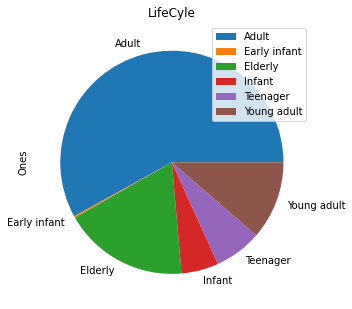

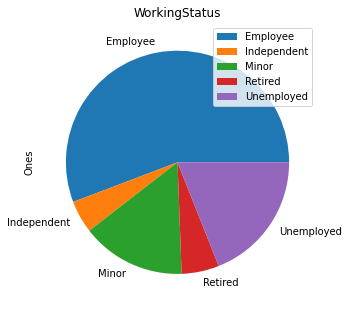

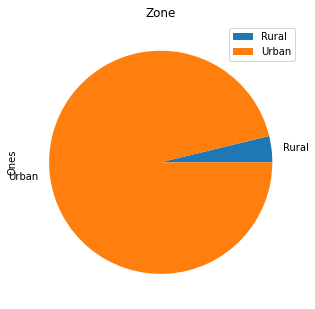

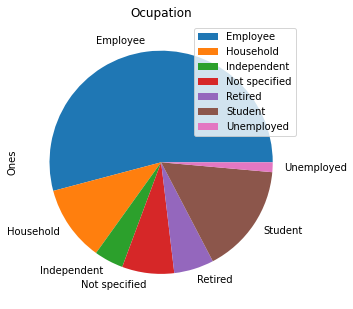

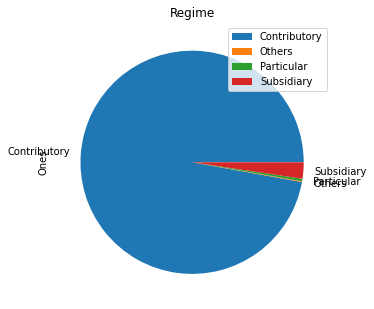

In [4]:
graphs = ['SEX', 'STRATUM','SOCIOECONOMIC_LEVEL','Education','MaritalStatus', 'LifeCyle', 'WorkingStatus',
          'Zone', 'Ocupation','Regime']
#fig,axes = plt.subplots(int(len(graphs)/2)+1,2,figsize=(90,40))
#i = 0
#j = 0
for g in graphs:
    plot = df[[g,'Ones']].groupby(g).count().plot.pie(y='Ones',figsize=(5,7))    #,ax = axes[i][j])
    plot.set_title(g)
#    j =j+1
#    if j == 2:
#        i = i+1
#        j = 0

In [8]:
dfDiag = pd.read_excel('data\Diagnosticos.xlsx')
dfDiag.drop([9220],inplace=True)
dfDiag['COD_CAP'] = dfDiag['CAPITULO'].apply(lambda x: x[:3])
dfDiag['NOM_CAP'] = dfDiag['CAPITULO'].apply(lambda x: x[6:])
dfDiag['COD_GRUPO'] = dfDiag['GRUPO'].apply(lambda x: x.split(" ",1)[0])
dfDiag['NOM_GRUPO'] = dfDiag['GRUPO'].apply(lambda x: x.split(" ",1)[1])
dfDiag['COD_SUBGRUPO'] = dfDiag['SUBGRUPO'].apply(lambda x: x.split(" ",1)[0])
dfDiag['NOM_SUBGRUPO'] = dfDiag['SUBGRUPO'].apply(lambda x: x.split(" ",1)[1])
dfDiag['COD_DIAG'] = dfDiag['DIAGNOSTICO'].apply(lambda x: x.split(" - ",1)[0])
dfDiag['NOM_DIAG'] = dfDiag['DIAGNOSTICO'].apply(lambda x: x.split(" - ",1)[1])
dfDiag[dfDiag['NOM_DIAG']== 'PARO RESPIRATORIO']

,CAPITULO,GRUPO,SUBGRUPO,DIAGNOSTICO,COD_CAP,NOM_CAP,COD_GRUPO,NOM_GRUPO,COD_SUBGRUPO,NOM_SUBGRUPO,COD_DIAG,NOM_DIAG
6558,"C18 - SINTOMAS, SIGNOS Y HALLAZGOS ANORMALES C...","R00-R99 SINTOMAS, SIGNOS Y HALLAZGOS ANORMALES...",R00-R09 SINTOMAS Y SIGNOS QUE INVOLUCRAN LOS S...,R092 - PARO RESPIRATORIO,C18,"SINTOMAS, SIGNOS Y HALLAZGOS ANORMALES CLINICO...",R00-R99,"SINTOMAS, SIGNOS Y HALLAZGOS ANORMALES CLINICO...",R00-R09,SINTOMAS Y SIGNOS QUE INVOLUCRAN LOS SISTEMAS ...,R092,PARO RESPIRATORIO


In [10]:
df2 = pd.read_excel('data\Hospitalizaciones.xlsx')
for c in df2.columns:
    df2.rename(columns={c:c.upper().replace(" ","_")},inplace = True)
#Llenar los diagnósticos sin resultados
dfD = df2[~df2['ID_DIAGNOSTICO_EGRESO'].isna() ] [['ID_DIAGNOSTICO_EGRESO','DESCRIPCIÓN_DIAGNOSTICO_(EGRESO)']].copy()
dfD.drop_duplicates(inplace=True)
dfD.set_index('DESCRIPCIÓN_DIAGNOSTICO_(EGRESO)',inplace=True)
dfD = dfD.to_dict()['ID_DIAGNOSTICO_EGRESO']
df2['DiagC']=df2['ID_DIAGNOSTICO_EGRESO']
df2['DiagC'].fillna(df2['DESCRIPCIÓN_DIAGNOSTICO_(EGRESO)'].apply(lambda x: dfD.get(x,pd.NA)),inplace = True)

dfD = dfDiag[['NOM_DIAG','COD_DIAG']].copy()
dfD.drop_duplicates(inplace=True)
dfD.set_index('NOM_DIAG',inplace=True)
dfD = dfD.to_dict()['COD_DIAG']
df2['DiagC'].fillna(df2['DESCRIPCIÓN_DIAGNOSTICO_(EGRESO)'].apply(lambda x: dfD.get(x,pd.NA)),inplace = True)
df2 = pd.merge(df2, dfDiag,how = 'left',right_on = ['COD_DIAG'],left_on = ['DiagC'])
diags = ['J450', 'J451', 'J458', 'J459', 'J46X']
df2['AsthmaDiagnostic'] = df2['DiagC'].apply(lambda x: 1 if x in diags else 0)
subGruposAsma = df2[(df2['AsthmaDiagnostic']==1) & (~df2['COD_SUBGRUPO'].isna()) ]['COD_SUBGRUPO'].unique()
gruposAsma = df2[(df2['AsthmaDiagnostic']==1) & (~df2['COD_SUBGRUPO'].isna())]['COD_GRUPO'].unique()
df2['AsthmaBlock'] = df2['COD_SUBGRUPO'].apply(lambda x: 1 if x in subGruposAsma else 0)
df2['AsthmaChapter'] = df2['COD_GRUPO'].apply(lambda x: 1 if x in gruposAsma else 0)
df2['MaxRelation'] = df2['AsthmaDiagnostic']+df2['AsthmaBlock']+df2['AsthmaChapter']
df2['MaxRelationT'] = df2['MaxRelation'].apply(lambda x: 'Diagnostic' if x==3 else ('Block' if x==2 else ('Chapter' if x==1 else 'Not related')))
df2['LifeCycle']= df2['EDAD_(AÑOS)'].apply(lambda x: 'Early infant' if x<6 else ('Infant' if x<12 else ('Teenager' if x<18 else ('Young adult' if x<27 else ('Adult' if x<60 else ('Elderly' if x<110 else pd.NA))))))
df2['Sex'] = df2['SEXO'].apply(lambda x: 'F' if x== 'Femenino' else ('M' if x =='Masculino' else 'N/A'))
df2['Ones'] = 1
df2.to_csv('data\HospitalizacionesL.csv',index=False)

In [20]:
mROrder = ['Diagnostic','Block','Chapter', 'Not related']
lcOrder = ['Early infant', 'Infant','Teenager','Young adult','Adult','Elderly']
df2R = df2[~df2['LifeCycle'].isna()][['ID','Ones','MaxRelationT','LifeCycle','Sex']].groupby(['ID','MaxRelationT','LifeCycle','Sex']).count().reset_index(drop = False).rename(columns={'Ones':'Count'})
df2R[df2R['Count']<0].head()

,ID,MaxRelationT,LifeCycle,Sex,Count


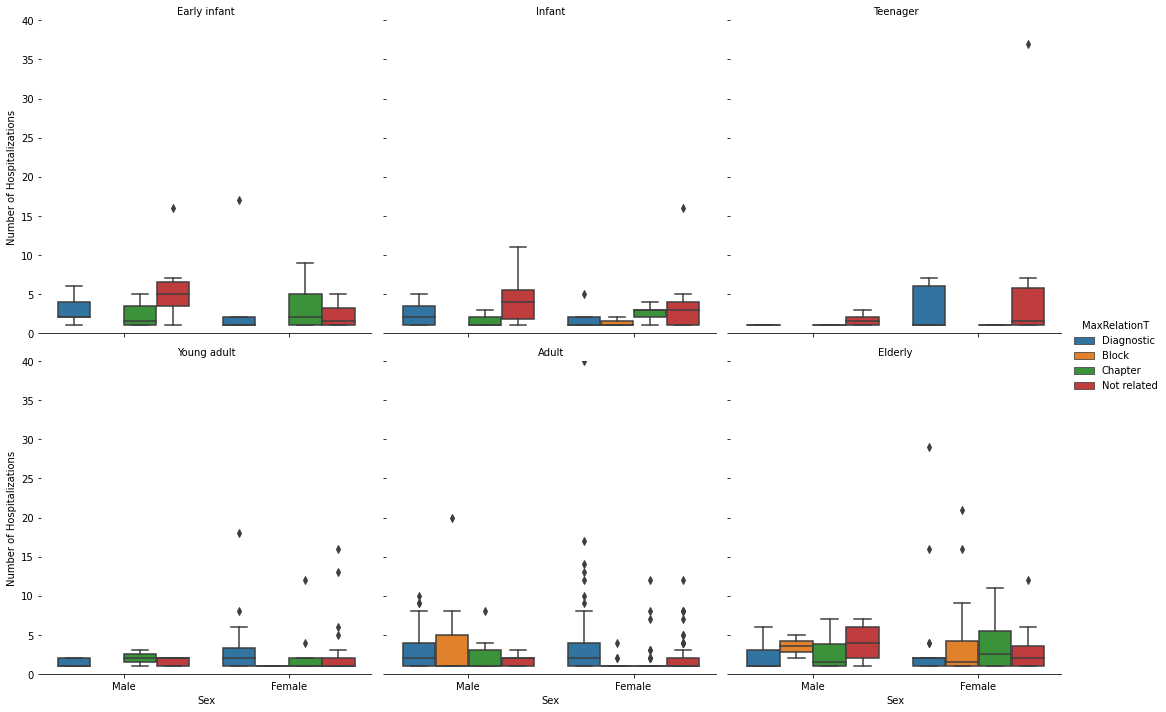

In [25]:
g = sns.catplot(x ='Sex',hue="MaxRelationT", y="Count",col="LifeCycle", hue_order = mROrder,col_order=lcOrder,data=df2R,kind="box",col_wrap=3)
g.set_axis_labels("Sex", "Number of Hospitalizations").set_xticklabels(["Male", "Female"]).set_titles("{col_name}").despine(left=True)
g.set(ylim=(0, 40))

In [18]:
print(subGruposAsma)
print(gruposAsma)

['J40-J47']
['J00-J99']


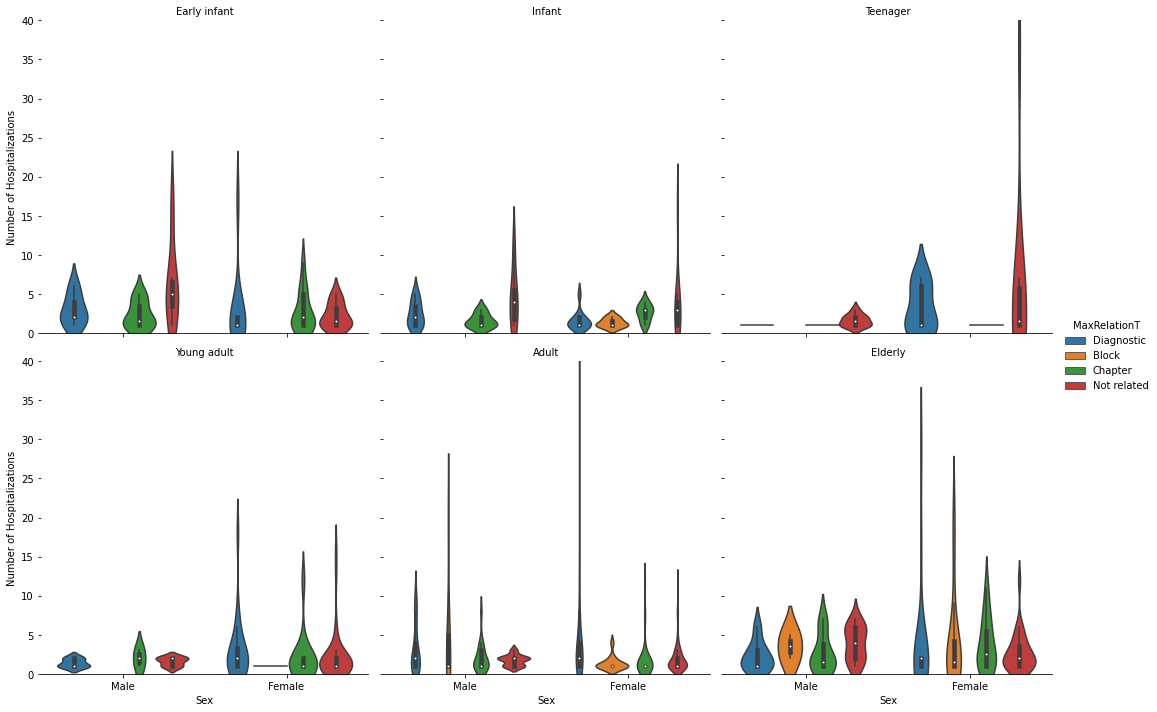

In [24]:
g = sns.catplot(x ='Sex',hue="MaxRelationT", y="Count",col="LifeCycle", hue_order = mROrder,col_order=lcOrder,data=df2R,kind="violin",col_wrap=3)
g.set_axis_labels("Sex", "Number of Hospitalizations").set_xticklabels(["Male", "Female"]).set_titles("{col_name}").despine(left=True)
g.set(ylim=(0, 40))

In [10]:
print(df2[df2['AsthmaDiagnostic']==1]['COD_SUBGRUPO'].unique())
subGruposAsma = df2[(df2['AsthmaDiagnostic']==1) & (~df2['COD_SUBGRUPO'].isna()) ]['COD_SUBGRUPO'].unique()
gruposAsma = df2[(df2['AsthmaDiagnostic']==1) & (~df2['COD_SUBGRUPO'].isna())]['COD_GRUPO'].unique()

['J40-J47']


In [11]:
#listD = dfDiag[dfDiag['NOM_DIAG'].apply(lambda x:x.find('ASM'))>-1]['NOM_DIAG'].unique()
diags = ['ASMA PREDOMINANTEMENTE ALERGICA','ASMA NO ALERGICA', 'ASMA MIXTA', 'ASMA, NO ESPECIFICADA','ESTADO ASMATICO']
dfDiag[dfDiag['NOM_DIAG'].isin(diags)]['COD_DIAG'].unique()



array(['J450', 'J451', 'J458', 'J459', 'J46X'], dtype=object)

In [23]:
df3 = pd.read_excel('data\Habitos.xlsx')
for c in df3.columns:
    df3.rename(columns={c:c.upper().replace(" ","_")},inplace = True)
df3['HABITO2']= df3[['HABITO2']].fillna("N/A")
df3['HABITO3']= df3[['HABITO3']].fillna("N/A")
df3.sort_values(by='FE_REGISTRO',ascending = False,inplace = True)
df3.drop_duplicates(['DS_IDENTIFICACION','TIPO'],keep='first',inplace=True)
df3['Ones'] = 1
tipos = {'EJERCICIO':'Exercise', 'CIGARRILLO':'Tobacco', 'ALCOHOL':'Alcohol', 'METODO DE PLANIFICACION':'Contraceptive methods',
       'ALIMENTACION':'Diet', 'MASCOTAS':'Pets', 'ESTADO ANÍMICO':'Mood','SUSTANCIAS PSICOACTIVAS':'Drugs', 'CONSUMO DE CAFE':'Coffee'}
df3['Types'] = df3['TIPO'].apply(lambda x: tipos[x])
df3['Habits'] = df3['HABITO2']+"-"+df3['HABITO3']
df3['Habits'] = df3['Habits'].apply(lambda x: x.replace("N/A",""))
df3['Habits'] = df3['Habits'].apply(lambda x: x.replace("-","") if (x.find("-") == 0 | x.find("-") == len(x)-1) else x)
habitos={'2 VECES POR SEMANA':'2 times a week', 'NO':'No', '3 VECES POR SEMANA':'3 times a week', 'ABSTEMIO':'No',
         'BEBEDOR SOCIAL':'Social drinker','FUMADOR PASIVO':'Pasive', 'T DE COBRE O DISPOSITIVO INTRAUTERINO DIU':'IDU',
         'BUENA ALIMENTACION':'Good diet', 'BEBEDOR MODERADO':'Moderate', 'NO APLICA':'Does not apply','NO PLANIFICA':'No', 
         'LIGADURA DE TROMPAS':'Tubal ligation', 'INYECTABLE':'Injectable','PILDORAS ANTICONCEPTIVAS':'Contraceptive pills', 
         'DISPOSITIVO ENDOCEPTIVO O MIRENA':'Mirena','EL CONDON':'Condom', 'HISTERECTOMIA':'Histerectomy', 'IMPLANTE SUBDERMICO':'Subdermic implant',
         'REGULAR ALIMENTACION':'Standarized diet', 'SI-PERRO':'Dog(s)', 'SI-AVES':'Bird(s)', 'SI-GATO':'Cat(s)','DIETA ESPECIAL':'Special diet',
         'GIMNASIO VARIAS VECES A LA SEMANA':'Several times a week','ANIMICAMENTE INESTABLE':'Unstable',
         'SI-B. ENTRE 6 Y 15 CIGARRILLOS EN PROMEDIO POR DIA':'6-15 daily','BEBEDOR EXCEPCIONAL':'Excepcional',
         'SI-A. MENOS DE 5 CIGARRILLOS EN PROMEDIO POR DIA':'<5 daily','BEBEDOR ABUSIVO SIN DEPENDENCIA':'Abusive - No dependence', 
         'SI':'Yes', 'DIARIO':'Daily','SI-1 a 3 tazas/dia':'1-3 cups/daily', '4 VECES POR SEMANA':'4 times weekly', 
         'SI-4 a 6 tazas/dia ':'4-6 cups/daily','ANIMICAMENTE ESTABLE':'Stable', 'MUY BUENA ALIMENTACION':'Very good',
         'SI-C. MAS DE 16 CIGARRILLOS EN PROMEDIO POR DIA':'16+ daily','SI-mas de 6 tazas/dia':'6+ cups/daily', 
         'SI-SIN DEFINIR':'Yes', 'ADICTO':'Adict', 'SI-PECES':'Fish','VASECTOMIA':'Vasectomy','MUY BAJO CONSUMO DE ALIMENTOS':'Low diet'}
df3['Habits'] = df3['Habits'].apply(lambda x: habitos.get(x,pd.NA))
df3.sort_values(by='FE_REGISTRO',inplace= True)
df3.to_csv('data/HabitosL.csv',index = False)

In [72]:
df3R = df3[['TIPO','HABITO2','HABITO3','Ones']].groupby(['TIPO','HABITO2','HABITO3']).count().reset_index(drop=False)
df3R

,TIPO,HABITO2,HABITO3,Ones
0,ALCOHOL,ABSTEMIO,N/A,184
1,ALCOHOL,BEBEDOR ABUSIVO SIN DEPENDENCIA,N/A,2
2,ALCOHOL,BEBEDOR EXCEPCIONAL,N/A,19
3,ALCOHOL,BEBEDOR MODERADO,N/A,8
4,ALCOHOL,BEBEDOR SOCIAL,N/A,30
5,ALIMENTACION,BUENA ALIMENTACION,N/A,131
6,ALIMENTACION,DIETA ESPECIAL,N/A,18
7,ALIMENTACION,MUY BAJO CONSUMO DE ALIMENTOS,N/A,1
8,ALIMENTACION,MUY BUENA ALIMENTACION,N/A,2
9,ALIMENTACION,REGULAR ALIMENTACION,N/A,17


array([nan, 'B. ENTRE 6 Y 15 CIGARRILLOS EN PROMEDIO POR DIA',
       'C. MAS DE 16 CIGARRILLOS EN PROMEDIO POR DIA',
       'A. MENOS DE 5 CIGARRILLOS EN PROMEDIO POR DIA', '1 a 3 tazas/dia',
       '4 a 6 tazas/dia ', 'mas de 6 tazas/dia', 'PERRO', 'PECES', 'GATO',
       'AVES', 'SIN DEFINIR'], dtype=object)

,TIPO,HABITO2,HABITO3,Ones
0,ALCOHOL,ABSTEMIO,N/A,214
1,ALCOHOL,BEBEDOR ABUSIVO SIN DEPENDENCIA,N/A,2
2,ALCOHOL,BEBEDOR EXCEPCIONAL,N/A,22
3,ALCOHOL,BEBEDOR MODERADO,N/A,9
4,ALCOHOL,BEBEDOR SOCIAL,N/A,32
5,ALIMENTACION,BUENA ALIMENTACION,N/A,139
6,ALIMENTACION,DIETA ESPECIAL,N/A,21
7,ALIMENTACION,MUY BAJO CONSUMO DE ALIMENTOS,N/A,1
8,ALIMENTACION,MUY BUENA ALIMENTACION,N/A,3
9,ALIMENTACION,REGULAR ALIMENTACION,N/A,18


,TIPO,HABITO2,HABITO3,Ones,Habitos
0,ALCOHOL,ABSTEMIO,N/A,214,ABSTEMIO
1,ALCOHOL,BEBEDOR ABUSIVO SIN DEPENDENCIA,N/A,2,BEBEDOR ABUSIVO SIN DEPENDENCIA
2,ALCOHOL,BEBEDOR EXCEPCIONAL,N/A,22,BEBEDOR EXCEPCIONAL
3,ALCOHOL,BEBEDOR MODERADO,N/A,9,BEBEDOR MODERADO
4,ALCOHOL,BEBEDOR SOCIAL,N/A,32,BEBEDOR SOCIAL
5,ALIMENTACION,BUENA ALIMENTACION,N/A,139,BUENA ALIMENTACION
6,ALIMENTACION,DIETA ESPECIAL,N/A,21,DIETA ESPECIAL
7,ALIMENTACION,MUY BAJO CONSUMO DE ALIMENTOS,N/A,1,MUY BAJO CONSUMO DE ALIMENTOS
8,ALIMENTACION,MUY BUENA ALIMENTACION,N/A,3,MUY BUENA ALIMENTACION
9,ALIMENTACION,REGULAR ALIMENTACION,N/A,18,REGULAR ALIMENTACION
